In [2]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


In [3]:
import graphviz
print(graphviz.__version__)


0.21


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
import graphviz


In [5]:
#  Step 2: Ensure Output Folder Exists
os.makedirs("../output", exist_ok=True)

#  Step 3: Load Dataset
df = pd.read_csv("../Data/heart.csv")
print("Dataset Loaded ✅")
print(df.head())
print(df.info())


Dataset Loaded ✅
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non

In [6]:
#  Step 4: Split Features and Target
X = df.drop("target", axis=1)
y = df["target"]

#  Step 5: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
#  Step 6: Train Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

#  Step 7: Make Predictions
y_pred = dtree.predict(X_test)

#  Step 8: Evaluate Model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Confusion Matrix:
 [[102   0]
 [  3 100]]


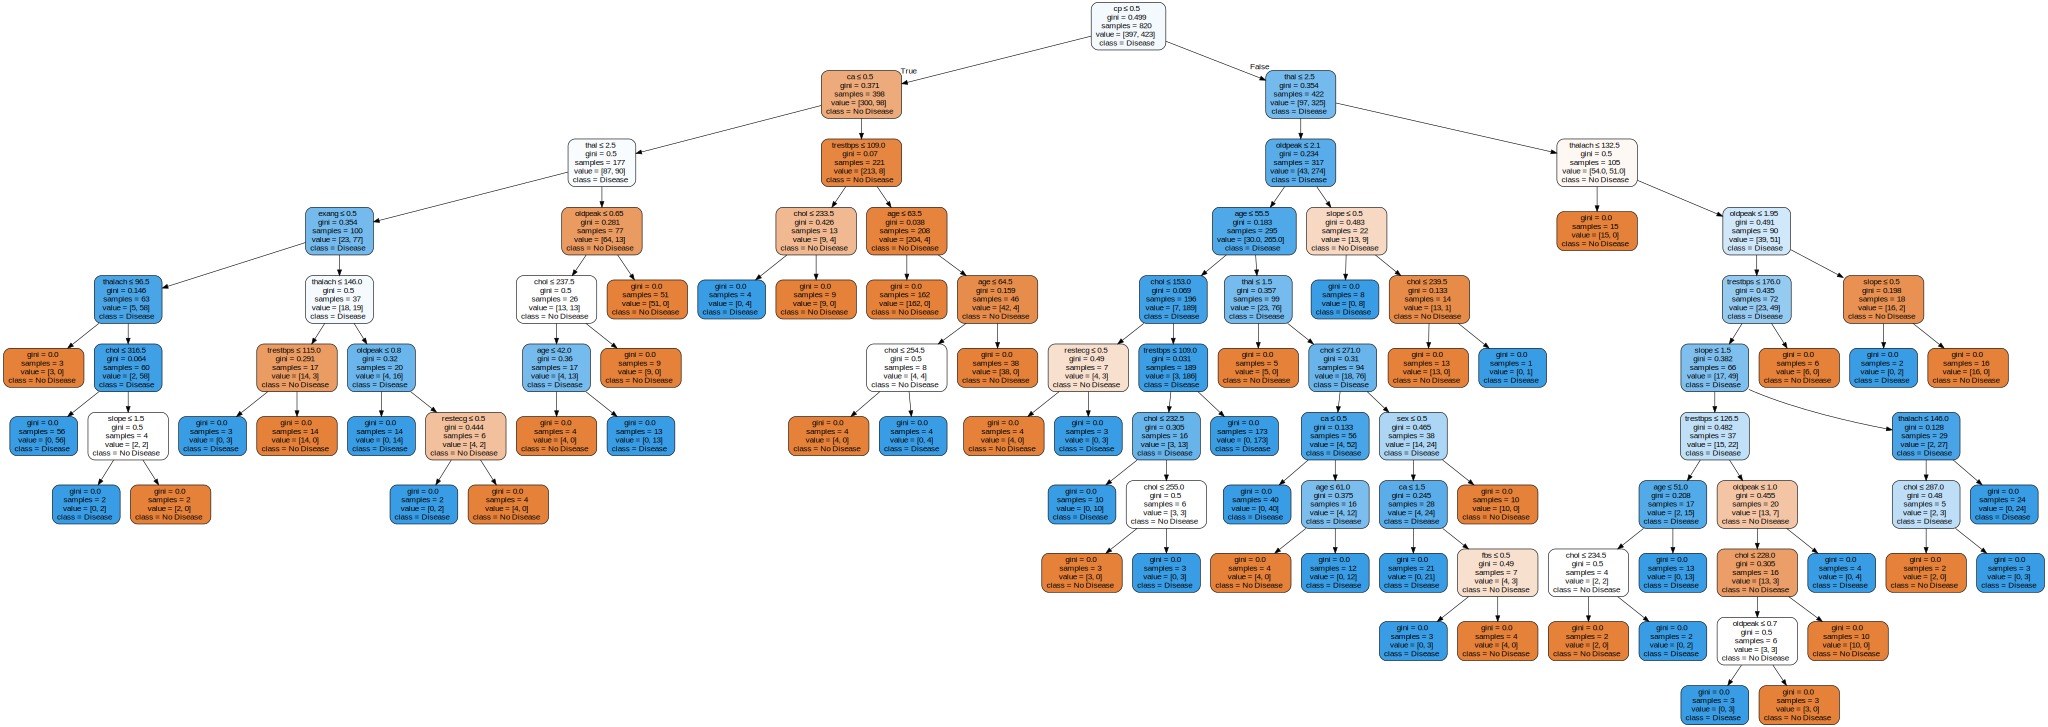

In [8]:
#  Step 9: Visualize Tree with Graphviz
dot_data = export_graphviz(
    dtree,
    out_file=None,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)

#  Save PNG to output folder
graph.render("../output/decision_tree_graphviz", format="png", cleanup=True)

#  Display in notebook (optional)
graph


In [9]:
# Limit tree depth to control overfitting
pruned_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
pruned_tree.fit(X_train, y_train)

# Evaluate
y_pruned_pred = pruned_tree.predict(X_test)
print("Classification Report (Pruned Tree):\n", classification_report(y_test, y_pruned_pred))


Classification Report (Pruned Tree):
               precision    recall  f1-score   support

           0       0.88      0.70      0.78       102
           1       0.75      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



In [10]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate
y_rf_pred = rf.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_rf_pred))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Feature Importances:
      Feature  Importance
2         cp    0.135072
11        ca    0.127327
7    thalach    0.122169
9    oldpeak    0.121905
12      thal    0.110518
0        age    0.077908
4       chol    0.074822
3   trestbps    0.071171
8      exang    0.057594
10     slope    0.045782
1        sex    0.028731
6    restecg    0.018557
5        fbs    0.008444


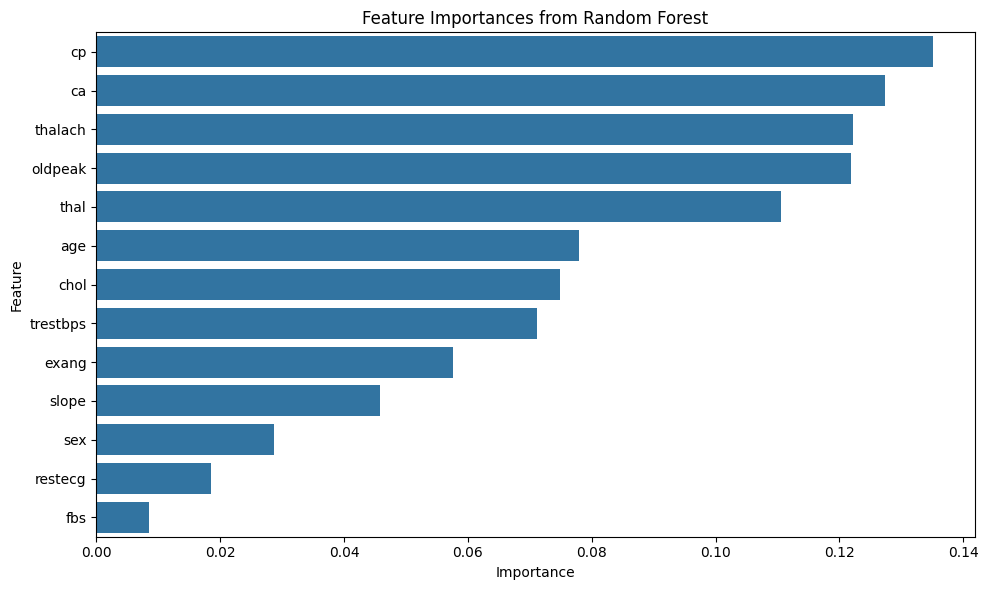

In [11]:
# Feature importance from Random Forest
importances = rf.feature_importances_
feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_df)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title("Feature Importances from Random Forest")
plt.tight_layout()
plt.savefig("../output/random_forest_feature_importance.png")
plt.show()


In [12]:
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation on Random Forest
cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average accuracy: {:.2f}%".format(cv_scores.mean() * 100))


Cross-validation scores: [1.         1.         1.         1.         0.98536585]
Average accuracy: 99.71%
